Please Find Dataset on https://www.kaggle.com/medharawat/google-stock-price

<h2>Build a Recurrent Neural Network to predict the stock price of Google using LSTM</h2>

In this project I will try to predict the stock price of Google using LSTM. Though the future stock price does not depend on the past, but I observe some trend. I will try to predict the upward and downward trend that exist in Google stocks and this would be done using LSTM (a special case of RNN's). I am going to implement a robust LSTM with stacked layers. I am also going to add drop outs and regularizers to avoid overfitting.

The purpose of this exercise is to train a Recurrent Neural Network to follow the directions taken by our predictions, rather than the closeness of their values to the real stock price. I want to check if our predictions follow the same directions as the real stock price.

I going to train our LSTM on 5 years of Google stock price starting from 2012 to 2016. After the model is trained I will try to predict the trend for the first month i.e January of year 2017.

<h2>Resources</h2>

1. https://www.investopedia.com/articles/active-trading/092514/google-stock-too-expensive-you-try-options.asp
2. https://www.nitinbhatia.in/stocks/can-i-predict-stock-price-movement/
3. https://www.quora.com/Can-machine-learning-algorithms-models-predict-the-stock-prices-If-yes-which-are-the-best-machine-learning-algorithm-models-to-predict-the-stock-prices
4. https://walletinvestor.com/stock-forecast/googl-stock-prediction
5. https://gov.capital/stock/googl-stock/
6. https://longforecast.com/alphabet-google-stock-price-forecast-2017-2018-2019
7. https://www.slideshare.net/ArkapravaKundu1/google-stock-price-forecasting

<h2>Data Preprocessing</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [7]:
#convert column a of a DataFrame
dataset_train["Close"] = dataset_train["Close"].str.replace(',', '').astype(float)

In [8]:
dataset_train["Volume"] = dataset_train["Volume"].str.replace(',', '').astype(float)

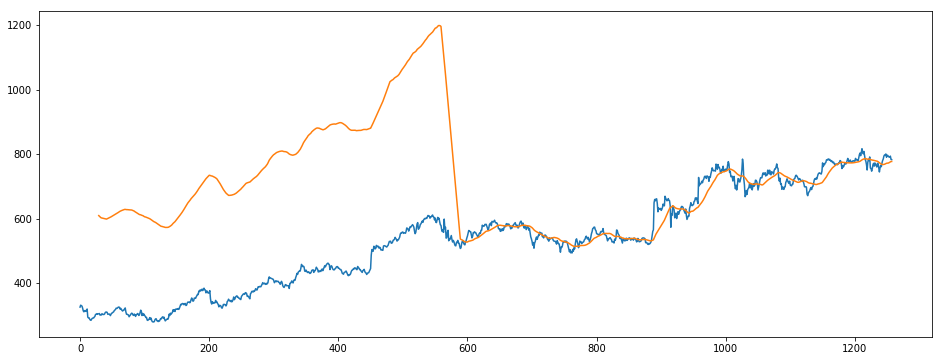

In [10]:
dataset_train['Open'].plot(figsize=(16,6))
dataset_train.rolling(window=30).mean()['Close'].plot()

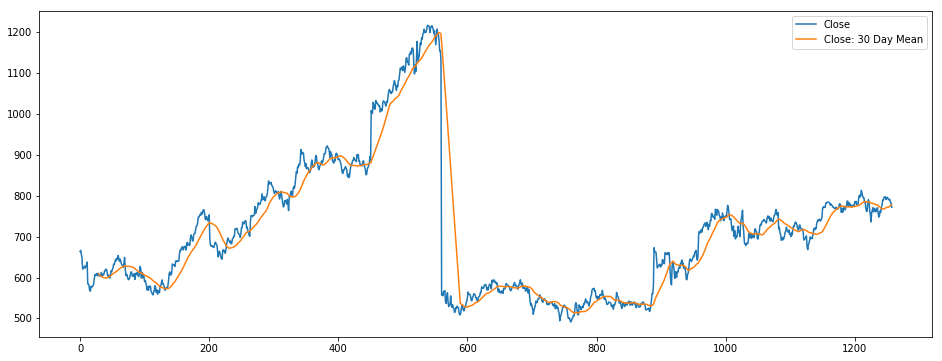

In [11]:
dataset_train['Close: 30 Day Mean'] = dataset_train['Close'].rolling(window=30).mean()
dataset_train[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [12]:
print(dataset_train.shape)
print(training_set.shape)

(1258, 7)
(1258, 1)


In [13]:
print(training_set[:5])

[[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]


Visualizing the Data using MATPLOTLIB (Date vs Opening Stock price)

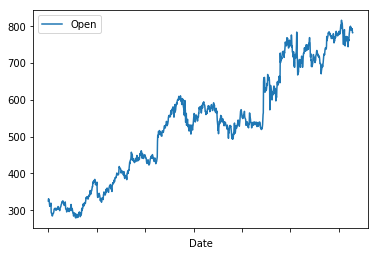

In [14]:
#Plotting the opening stock price from 2012 to 2016
dataset_train[:].plot(x='Date', y='Open')
plt.show()

<h2>FEATURE SCALING</h2>

Feature scaling is done to scale the data in order to achieve better convergence and learning.

    Standardisation: (x-mean(x))/(standard daviation(x))

    Normalisation: (x-min(x))/(max(x)-min(x))

Here I will be using normalization because in the output layer sigmoid curve will be used as activation function.


In [15]:
#When use RNN and use sigmoid as activation function then Normalize data instead of standardise
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


<h2>Data Structure Design</h2>

1. Creating a Data Structure wuth 60 timesteps and 1 output

2. RNN view each time t has 60 seq_dim(stock proce) to predict the next output

3. stock operate about 20 days in a month, I view 3 months(60 days) as input_sequence model

<h2>Timestamps</h2>

I will use 60 timestamps that means I will predict the value after analysing previous 60 days prices. Number of time stamps is the most crucial part of RNNs.


In [16]:
x_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [18]:
print(X_train[0:1])

[[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
  0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
  0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
  0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
  0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
  0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
  0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
  0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
  0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
  0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]]


In [19]:
print(y_train[0])

0.08627874097775134


In [20]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

<h2>Adding a new dimension</h2>

Reshape to (batch_size,seq_dim,input_dim)

keras RNN Layer 3D tensor

In [21]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train[0:1])

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]
  [0.06568569]
  [0.06109085]
  [0.06639259]
  [0.0614257 ]
  [0.07474514]
  [0.02797827]
  [0.02379269]
  [0.02409033]
  [0.0159238 ]
  [0.01078949]
  [0.00967334]
  [0.01642607]
  [0.02100231]
  [0.02280676]
  [0.02273235]
  [0.02810849]
  [0.03212665]
  [0.0433812 ]
  [0.04475779]
  [0.04790163]
  [0.0440695 ]
  [0.04648783]
  [0.04745517]
  [0.04873875]
  [0.03936305]
  [0.04137213]
  [0.04034898]
  [0.04784582]
  [0.04325099]
  [0.04356723]
  [0.04286033]
  [0.04602277]
  [0.05398467]
  [0.05738894]
  [0.05714711]
  [0.05569611]
  [0.04421832]
  [0.04514845]
  [0.04605997]
  [0.04412531]
  [0.03675869]
  [0.04486941]
  [0.05065481]
  [0.05214302]
  [0.05612397]
  [0.05818885]
  [0.06540665]
  [0.06882953]
  [0.07243843]
  [0.07993526]
  [0.07846566]
  [0.08034452]
  [0.08497656]]]


In [22]:
X_train.shape

(1198, 60, 1)

<h2>Building the RNN</h2>

LSTM Layer, the most important parameters : output units,input shape,return Sequential
        
Because I am predicting the continuous data , so the cost_function I am useing MSE

<h2>Training Model</h2>

In [23]:
#importing the Keras Libraries and package
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<h2>Building RNN model</h2>

In [28]:
#Initialising the RNN
Model_1 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation 
Model_1.add(LSTM(units =50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
Model_1.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation 
Model_1.add(LSTM(units =50, return_sequences = True))
Model_1.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation 
Model_1.add(LSTM(units =50, return_sequences = True))
Model_1.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation 
Model_1.add(LSTM(units =50))
Model_1.add(Dropout(0.2))

#Adding the output layer
Model_1.add(Dense(1, activation='sigmoid'))

# Printing the model summary
print(Model_1.summary())

#Compiling the RNN
Model_1.compile(optimizer='adam', loss='mean_squared_error')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_19 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 50)                20200     
__________

In [34]:
#Fitting the RNN to the Training set
history_1 = Model_1.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0025
Epoch 2/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0023
Epoch 3/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0024
Epoch 4/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0021
Epoch 5/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0020
Epoch 6/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0019
Epoch 7/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0019
Epoch 8/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0019
Epoch 9/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0019
Epoch 10/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0019
Epoch 11/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0019
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 8s 6ms/step - loss: 0.0011
Epoch 96/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0012
Epoch 97/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0012
Epoch 98/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0011
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0011
Epoch 100/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0012


<h2>Making the predictions and visualising the results</h2>

After the model is trained , I will try to make the predictions on the test data set and visualise the results. But since the test dataset contains only 20 values and in order to fit into the model for predictions I need the previous 60 time stamps values. Thus I concatenate training set and testing set and then try to predict accordingly.I need to have the right format for the input.

<h2>Test Set</h2>
<h2>Key Points</h2>

1. I made prediction using 60 stock prices so I will have to keep that in mind.

2. For making predictions on January days I have to get 60 days prices and for that I will have to use some of our training data. I have to generalize this concept to all other datasets as well. So these are very important points when making predictions using RNNs.

3. Third key point is how to concatenate. I have to keep in mind the dates.

<h2>Predict and Evaluate by Test Set</h2>

Step1.read testing data

Step2.fetch intersted data from training for evaluate，

Step3.Struct Data Structure for Sequence

Step4.Transform format in order to feed into LSTM/RNN

Step5.Predict，do Inverse function,I want to know the real stock price, not the transformed data

In [35]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [36]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [37]:
len(real_stock_price)

20

In [38]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

<h2>prediction of Stock</h2>

In [39]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
xtest = []
for i in range(60, 80):
    xtest.append(inputs[i-60:i, 0])
xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [40]:
len(dataset_total)

1278

In [41]:
inputs.shape

(80, 1)

In [42]:
predicted_stock_price = regressor.predict(xtest)

In [43]:
#transforming the data back to original form
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [44]:
print(predicted_stock_price)

[[763.20166]
 [761.1261 ]
 [766.7223 ]
 [768.24774]
 [772.2674 ]
 [780.7069 ]
 [784.23914]
 [781.75024]
 [781.72455]
 [783.4279 ]
 [784.0655 ]
 [783.11835]
 [782.338  ]
 [783.60895]
 [784.689  ]
 [793.9719 ]
 [802.19476]
 [807.8291 ]
 [806.4355 ]
 [793.1036 ]]


In [46]:
error=0
for i in range(0,len(real_stock_price)):
    error+=abs((real_stock_price[i]-predicted_stock_price[i])/real_stock_price[i]) * 100
print("accuracy=",100-error)

accuracy= [97.20721384]


It's time to visualise the results and check the robustness of the model.

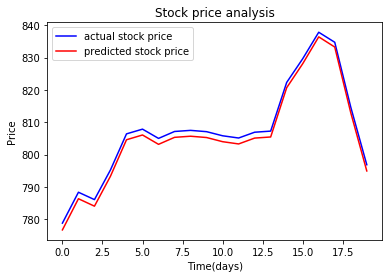

In [47]:
plt.plot(actual_price, color= 'blue', label= 'actual stock price')
plt.plot(predicted_vals, color= 'red', label= 'predicted stock price')
plt.title('Stock price analysis')
plt.xlabel('Time(days)')
plt.ylabel('Price')
plt.legend()
plt.show()

<h2>Evaluate the model</h2>


The RNN built was a regressor. For Regression, the way to evaluate the model performance is with a metric called RMSE (Root Mean Squared Error). It is calculated as the root of the mean of the squared differences between the predictions and the real values.

In [50]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print ("The root mean squared value of our model= {}".format(rmse) )

The root mean squared value of our model= 2.9717350482953746


In [52]:
relative_error = rmse/800
print(relative_error)

0.0017096523212582714


<h2>Observations:</h2>

1. My model performs well and follows the trend overall
    
2. The RNN/LSTM model reacts well to smooth changes

3. I can see my Model is able to Recognise Upwards and Downwards of Prices

4. Blue line is able to Track than when price will go Up and when it will come down

<h2>Resources</h2>

1. https://www.investopedia.com/articles/active-trading/092514/google-stock-too-expensive-you-try-options.asp
2. https://www.nitinbhatia.in/stocks/can-i-predict-stock-price-movement/
3. https://www.quora.com/Can-machine-learning-algorithms-models-predict-the-stock-prices-If-yes-which-are-the-best-machine-learning-algorithm-models-to-predict-the-stock-prices
4. https://walletinvestor.com/stock-forecast/googl-stock-prediction
5. https://gov.capital/stock/googl-stock/
6. https://longforecast.com/alphabet-google-stock-price-forecast-2017-2018-2019
7. https://www.slideshare.net/ArkapravaKundu1/google-stock-price-forecasting